Frekvenssit dikotomiselle muuttujille

Dummy muuttuja saa arvokseen 0 tai 1. Esimerkiksi kyselyissä voi olla monivalintakysymys, jonka vaihtoehdoista vastaaja saa valita useammankin, kuin yhden. Tämä arvo muutetaan dummy-muuttujiksi. Jokainen kysymyksen vaihtoehto on muttuja, joka saa arvokseen yksi, jos vastaaja on sen valinnut. Muussa tapauksessa arvo on 0 tai tyhjä.

Usein valintakysymyksiä (saa valita vain yhden vaihtoehdon) kutsutaan virheellisesti monivalintakysymyksiksi. Valintakysymystä ei kannata koodata dummy-muuttujiksi paitsi koneoppimisen malleja käytettäessä.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [4]:
df = pd.read_excel("https://taanila.fi/data1.xlsx")
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


In [5]:
# Yhteenvetoon otettavat muuttujat
dummy = ["työterv", "lomaosa", "kuntosa", "hieroja"]

In [7]:
# Valintojen lkm sum-funktiolla
df1 = df[dummy].sum().to_frame('f').sort_values('f', ascending=False)

# shape[0] antaa datan rivien lkm
n = df.shape[0]

#Prossat
df1["%-vastaajista"] = df1["f"]/n*100

df1.style.format({'f':"{:.0f}", "%-vastaajista":"{:.1f}"})

,f,%-vastaajista
työterv,47,57.3
hieroja,22,26.8
lomaosa,20,24.4
kuntosa,9,11.0


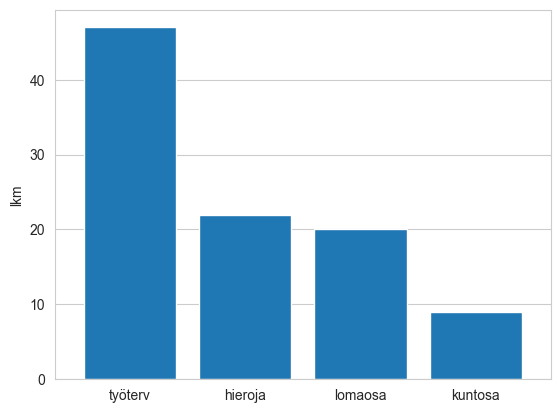

In [8]:
df1["f"].plot.bar(width=0.8, rot=0)

plt.ylabel("lkm")
plt.grid(axis="x")

Text(0, 0.5, 'lkm')

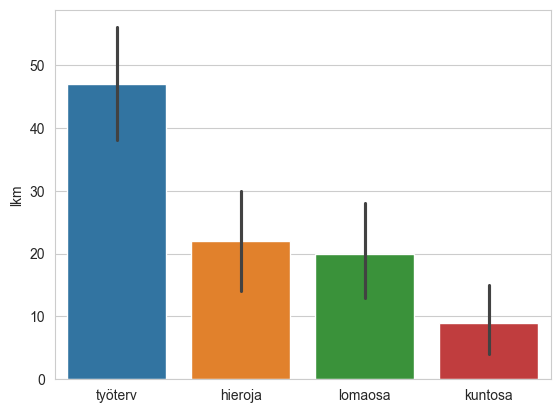

In [9]:
# Kaavion voi tehdä myös seaborn barplot-funktiolla

list = df[dummy].sum().sort_values(ascending=False).index

# Täytetään korvaavat arvot nollilla
sns.barplot(data=df[list].fillna(0), estimator=sum)

plt.ylabel("lkm")